In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/nifty 50 data for prediction.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))
df.set_index('Date',drop=True,inplace=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your dataframe and transform it
df1 = scaler.fit_transform(df)

In [5]:
df1.shape

(2014, 18)

In [6]:
df1 = pd.DataFrame(df1, columns=df.columns)

In [7]:
training_size = round(len(df1) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1611

In [8]:
train_data = df1[:training_size]
test_data  = df1[training_size:]

train_data.shape, test_data.shape

((1611, 18), (403, 18))

In [10]:
df1.head()

,Open,High,Low,Close,Volume,next day,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_50,Trend_50,Close_Ratio_200,Trend_200,Close_Ratio_750,Trend_750,RSI
0,0.009377,0.011492,0.019059,0.014012,0.136223,0.015216,1.0,0.675431,1.0,0.699165,0.8,0.639959,0.333333,0.372823,0.095238,0.368012,0.023810,0.415731
1,0.008942,0.012238,0.020201,0.015216,0.106184,0.016723,1.0,0.634978,1.0,0.674268,0.8,0.648373,0.370370,0.377369,0.119048,0.371085,0.047619,0.429069
2,0.011376,0.013861,0.023656,0.016723,0.085257,0.008804,0.0,0.637926,1.0,0.682694,0.8,0.657588,0.407407,0.382966,0.119048,0.374998,0.047619,0.446358
3,0.013374,0.013182,0.016715,0.008804,0.107344,0.003048,0.0,0.544896,0.5,0.559056,0.8,0.623708,0.370370,0.359676,0.119048,0.352741,0.047619,0.375918
4,0.002869,0.003596,0.011607,0.003048,0.110271,0.000000,0.0,0.565402,0.0,0.493150,0.6,0.599994,0.370370,0.342894,0.119048,0.336535,0.023810,0.330971


In [14]:
# Assuming df1 contains the scaled data and "Target" column
# Step 1: Prepare Input and Target Data
X = df1.drop(columns=["Target", "next day"])
y = df1["Target"]

# Step 2: Split Data into Training and Testing Sets
training_size = round(len(df1) * 0.80)
X_train = X[:training_size]
y_train = y[:training_size]
X_test = X[training_size:]
y_test = y[training_size:]

# Step 3: Reshape Input Data for LSTM
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# Print shapes of train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1611, 1, 16)
y_train shape: (1611,)
X_test shape: (403, 1, 16)
y_test shape: (403,)


In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, shuffle=True)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
41/41 [==============================] - 5s 22ms/step - loss: 0.6881 - accuracy: 0.5512 - val_loss: 0.6925 - val_accuracy: 0.5232
Epoch 2/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5512 - val_loss: 0.6919 - val_accuracy: 0.5232
Epoch 3/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5512 - val_loss: 0.6908 - val_accuracy: 0.5232
Epoch 4/10
41/41 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5551 - val_loss: 0.6912 - val_accuracy: 0.5232
Epoch 5/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5512 - val_loss: 0.6902 - val_accuracy: 0.5232
Epoch 6/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5512 - val_loss: 0.6904 - val_accuracy: 0.5232
Epoch 7/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.5512 - val_loss: 0.6896 - val_accuracy: 0.5232
Epoch 8/10
41/41 [=

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1) based on a threshold
threshold = 0.5  # You can adjust this threshold if needed
binary_predictions = (predictions > threshold).astype(int)

# Print the predicted values
print("Binary Predictions:", binary_predictions)

In [17]:
import pandas as pd

# Convert predictions to binary values (0 or 1) based on a threshold
threshold = 0.5  # You can adjust this threshold if needed
binary_predictions = (predictions > threshold).astype(int)

# Create a DataFrame with target and predicted values
predictions_df = pd.DataFrame({
    "Target": y_test.values,  # Assuming y_test contains the actual target values
    "Prediction": binary_predictions.flatten()  # Flatten predictions to match the length of y_test
})

# Print the DataFrame
print(predictions_df)


     Target  Prediction
0       0.0           1
1       1.0           0
2       1.0           1
3       1.0           1
4       1.0           1
..      ...         ...
398     1.0           1
399     1.0           1
400     1.0           1
401     1.0           1
402     0.0           1

[403 rows x 2 columns]


In [23]:
predictions_df

,Target,Prediction
0,0.0,1
1,1.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
398,1.0,1
399,1.0,1
400,1.0,1
401,1.0,1


In [ ]:
type(predictions_df)

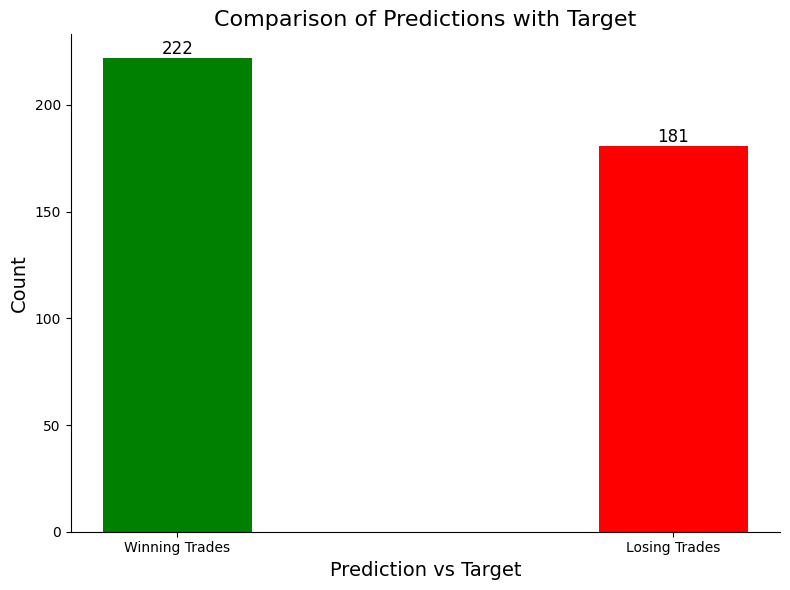

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions_df['Target'] == predictions_df['Prediction']).sum()
losing_trades = (predictions_df['Target'] != predictions_df['Prediction']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()
